In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

import warnings
import matplotlib.pyplot as plt
import pandas as pd 

from experiment.run_experiment import run_experiment, Config 
from dataset.gen_dataset import SynthConfig, LibsvmConfig
from algorithms.ms_algorithm import MSBisectionConfig, MSNoBisectionConfig
from algorithms.acr import ACRConfig
from algorithms.adaptive_acr import AdaptiveACRConfig
from algorithms.newton import NewtonMethodConfig
from algorithms.gradient_descent import GDConfig
from algorithms.AGD import AGDConfig
from algorithms.scipy_optimizer import ScipyOptimizerConfig

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 40
pd.options.display.max_rows = 200


## Configs of second-order and first-order methods: 

Important Config args: 
* iteration_budget - how many iterations to run (default = 250)
* objective_type - the objective we solve (default = "logistic_regression", for worst-case experiments use "gen_chain")
* algorithm - possible choices: 
["opt_ms_algorithm", "ms_algorithm", "newton_method", "acr", "adaptive_acr", "GD", "AGD", "scipy_optimizer"]
* algorithm_config - appropriate configuration for the algorithm (see example below)
* dataset - defines the dataset function to use (default is "libsvm")
* dataset_config -  appropriate configuration for the dataset function (see example below)

In [2]:
#### config examples: 

######### our methods ############# 

# alg1 + second-order adaptive oracle config
alg1_adaptive_config = Config(algorithm="opt_ms_algorithm", algorithm_config=MSNoBisectionConfig(lazy_oracle=True))

# iterating second-order adaptive oracle config 
iterating_adaptive_config = Config(
                                   algorithm="opt_ms_algorithm", 
                                   algorithm_config=MSNoBisectionConfig(drop_momentum=True, lambda_func="previous_lambda", alpha=0.5)
                                  )

# alg1 + first order adaptive oracle config
alg1_fo_adaptive_config = Config(algorithm="opt_ms_algorithm", 
                                 algorithm_config=MSNoBisectionConfig(oracle_type="amsn_fo_oracle", lazy_oracle=True))

# iterating first-order adaptive oracle config 
iterating_fo_adaptive_config = Config(algorithm="opt_ms_algorithm", 
                                      algorithm_config=MSNoBisectionConfig(oracle_type="amsn_fo_oracle", 
                                                                           drop_momentum=True, lambda_func="previous_lambda", alpha=0.5)
                                     )


######### non adaptive second-order methods ##########

# Song et al. : 
song_config = Config(
    algorithm="opt_ms_algorithm",
    algorithm_config=MSNoBisectionConfig(A_prime=False, lambda_func="lower_A_bound", oracle_type="cr_oracle", 
                                         exact_first_bisection=False, sec_ord_smoothness=0.1)
)

# Song et al. with exact first bisection: 
song_exact_first_config = Config(
    algorithm="opt_ms_algorithm",
    algorithm_config=MSNoBisectionConfig(A_prime=False, lambda_func="lower_A_bound", oracle_type="cr_oracle", 
                                         sec_ord_smoothness=0.1)
)

# ACR config
acr_config = Config(algorithm="acr", algorithm_config=ACRConfig(sec_ord_smoothness=0.1))

# CR config
cr_config = Config(
    algorithm="opt_ms_algorithm",
    algorithm_config=MSNoBisectionConfig(drop_momentum=True, oracle_type="cr_oracle", sec_ord_smoothness=0.1)
)

# alg 0. + cr oracle config
alg0_cr_config = Config(algorithm="ms_algorithm", 
                        algorithm_config=MSBisectionConfig(oracle_type="cr_oracle", sec_ord_smoothness=0.1))

# alg 1. + cr oracle config
alg1_cr_config = Config(algorithm="opt_ms_algorithm", 
                        algorithm_config=MSNoBisectionConfig(oracle_type="cr_oracle", sec_ord_smoothness=0.1))

# to change the M parameter of the "cr_oracle": 
# change sec_ord_smoothness in the algorithm_config, for example: 
# config = Config(
#     algorithm="opt_ms_algorithm", 
#     algorithm_config=MSNoBisectionConfig(
#         oracle_type="cr_oracle", 
#         sec_ord_smoothness=0.001
#     ))

######### adaptive second-order methods ##########


# adaptive acr config
adaptive_acr_config = Config(algorithm="adaptive_acr", algorithm_config=AdaptiveACRConfig())

# alg 0. + adaptive oracle config
alg0_adaptive_config = Config(algorithm="ms_algorithm", algorithm_config=MSBisectionConfig())



# Newton's method config 
newton_config = Config(algorithm="newton_method",algorithm_config=NewtonMethodConfig())





######### first-order methods ##########

# gradient descent config 
gd_config = Config(algorithm="GD",algorithm_config=GDConfig(step_size=30))

# AGD config 
agd_config = Config(algorithm="AGD",algorithm_config=AGDConfig(step_size=10))


# lbfgs config 
lbfgs_config  = Config(algorithm="scipy_optimizer", algorithm_config=ScipyOptimizerConfig())


#### Choose algorithm, iteration budget and dataset: 

In [3]:
########## choose algorithm: 

config = alg1_adaptive_config

########## choose iteration budget: 
config.iteration_budget = 50

########## choose dataset: 

dataset_name="a9a"  # can replace with "splice" and "w8a" for other libsvm datasets
dataset="libsvm" 
dataset_config=LibsvmConfig(dataset_name=dataset_name)

# for the synthetic dataset use: 
# dataset = "Synth"
# dataset_config = SynthConfig()

config.dataset = dataset
config.dataset_config = dataset_config

## Run experiment: 

the run_experiment function will create an "experiment_results" directory and save the experiments outputs there

In [4]:
# if you dont want to save the results run this cell 
save_experiments = False 
if not save_experiments: 
    config.save_results = False

In [5]:
x, outputs = run_experiment(config)

2022-05-28 21:15:23.332 | INFO     | experiment.run_experiment:run_experiment:58 - running experiment: Config(description='', output_dir='../experiments_results', save_results=False, dataset='libsvm', sampling_seed=4, dataset_config=LibsvmConfig(dataset_name='a9a', dataset_size=None, dataset_root=None, dataset_seed=3, train=True), normalize_features=True, objective_type='logistic_regression', regularization=0.0, dim=200, iteration_budget=50, algorithm='opt_ms_algorithm', algorithm_config=MSNoBisectionConfig(lambda_func='halving_doubling', alpha=2, norm_x_opt=None, first_lambda_guess=0.1, drop_momentum=False, stop_loss=100000.0, min_grad_norm=1e-15, exact_first_bisection=True, first_order_complexity_budget=10000000000.0, oracle_type='amsn', sigma=0.5, lazy_oracle=True, sec_ord_smoothness=None, cr_oracle_accuracy=1e-05, mul_up=2, mul_down=2, lambda_newton=1e-10, A_prime=True, best_x_update=False), logger_level='INFO', test_size=0)
2022-05-28 21:15:23.391 | INFO     | experiment.run_exper

Dataset: a9a


2022-05-28 21:15:24.540 | INFO     | algorithms.ms_algorithm:opt_ms_algorithm:237 - first order complexity = 134
2022-05-28 21:15:24.541 | INFO     | algorithms.ms_algorithm:opt_ms_algorithm:238 - running iteration 20,  loss:0.32304426604197006, gradient norm: 6.485095555890661e-05, 1/A=6.681536389011508e-06
2022-05-28 21:15:26.033 | INFO     | algorithms.ms_algorithm:opt_ms_algorithm:237 - first order complexity = 343
2022-05-28 21:15:26.034 | INFO     | algorithms.ms_algorithm:opt_ms_algorithm:238 - running iteration 40,  loss:0.3226688551578954, gradient norm: 1.2236393652430254e-05, 1/A=7.687607819225884e-07


## Experiment outputs dataframe: 

In [6]:
# this dataframe contains logs from the main algorithm and from other inner functions
# to get only the relevant rows run this cell 
outputs = outputs.query('iteration_type.str.contains("outer")')

In [7]:
# important columns for second-order methods are: 
sec_order_columns =  [ "loss", 'number_of_hessian_computations', 'number_of_linear_system_solves', 'method_name', 'grad_norm'] 
results_second_order = outputs[sec_order_columns]

In [8]:
# for first-order methods: 
outputs = outputs.assign(firstorder_complexity = lambda df: df.number_of_hvp_computations + df.number_of_grad_computations + 
                         df.number_of_fn_computations)

results_first_order=outputs[['loss', 'firstorder_complexity', 'method_name', 'grad_norm']]

## Plot the norm of the gradient: 

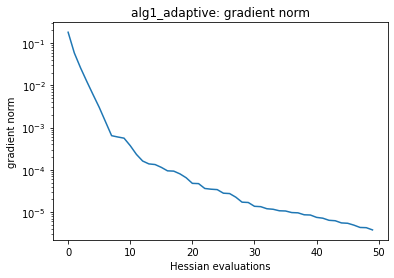

In [9]:
y = 'grad_norm'
y_label = 'gradient norm'
x = 'number_of_hessian_computations'
x_label = 'Hessian evaluations'
plt.plot(results_second_order[x], results_second_order[y])
plt.title(results_second_order['method_name'].unique()[0] + ': ' + y_label)
plt.yscale('log')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()